<a href="https://colab.research.google.com/github/deebuls/devblog/blob/master/_notebooks/2023-02-14-Cauchy-Distribution-BoxCox-Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting a Cauchy distirbution to nearby Gaussian 

Boxcox transformation data transforms the data to another scale and also makes it gaussian distirbution

## Using Boxcox transformation 


1. Plot the wikipedia cauchy distribution
2. Use boxcox and convert data to corresponding gaussian distribution 
3. Boxcox requires data to be positive so we use an alternative method yeojohnson. Unlike boxcox, yeojohnson does not require the input data to be positive.




For an application in uncertainty quantification we wanted to compare a Gaussian distribution with a Cauchy distribution. 

## Solution
* transform the cauchy distribution data to gaussian distirbuted data
* get the 95% conditional intervals 
* transform the conditional intervals back to the cauchy data space. 

## Conclusion 
* Its transformation using the data and estimating the loc with boxcox (power transformations) to gaussian and back is not good for long tailed distirbutions like cauchy.
* I am not sure what is wrong in the method below. Do message me in github if you find a way to do it.

I written another blog on [how to compare cauchy and gaussian using interval score ](https://deebuls.github.io/devblog/statistics/uncertainty/2022/12/15/comparing-Normal-Laplace-Cacuhy-Distirbutions-Interval-score.html) .

In [1]:
import scipy.stats as stats
import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt
import seaborn as sns

## Create 3 Cacuhy distirbution with mean 10 and scale 0.5, 1, 2


In [2]:
loc = 10
rv_1 = cauchy(loc=loc, scale=0.1)
rv_2 = cauchy(loc=loc, scale=0.01)
rv_half = cauchy(loc=loc, scale=0.001)

In [3]:
x= np.linspace(rv_1.ppf(0.1), rv_1.ppf(0.9),  100)

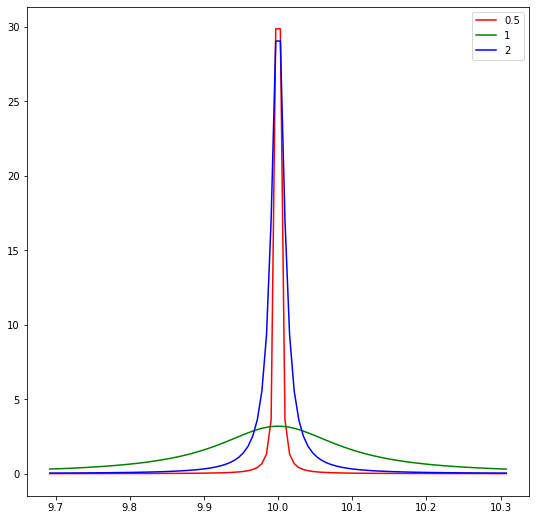

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9,9))
ax.plot(x, rv_half.pdf(x), c='r', label='0.5')
ax.plot(x, rv_1.pdf(x), c='g', label= '1')
ax.plot(x, rv_2.pdf(x), c='b', label= '2')
ax.legend()

### Probplot against cauchy distribution

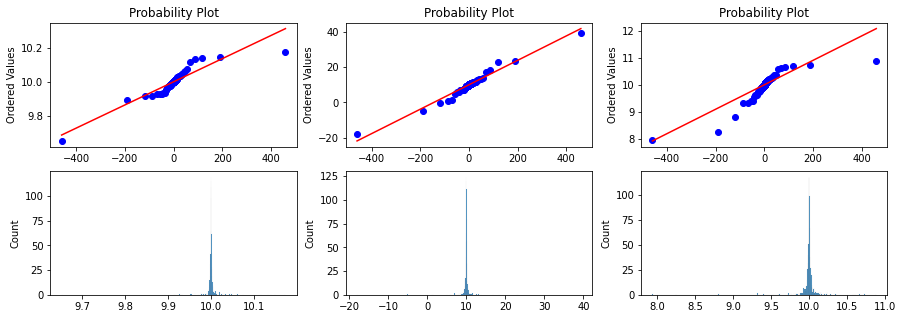

In [5]:
fig, ax = plt.subplots(2,3, figsize=(15,5))
#Plot 1 = Histogram
#g1 = sns.histplot(data=df, x='Price_in_thousands', ax=g[0]);

for index, rv in enumerate([rv_half, rv_1, rv_2]):
    x = rv.rvs(1000)
    prob = stats.probplot(x, dist=stats.cauchy, plot=ax[0][index])
    ax[0][index].set_xlabel('')
    g1 = sns.histplot(data=x, ax=ax[1][index]);

### Probplot against normal distribution

Here we take the same cauchy samples but pass through the probplot with distribution set to Normal.



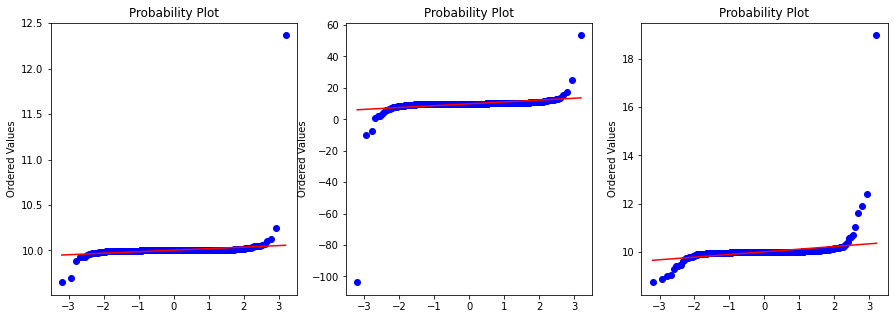

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for index, rv in enumerate([rv_half, rv_1, rv_2]):
    x = rv.rvs(1000)
    prob = stats.probplot(x, dist=stats.norm, plot=ax[index])
    ax[index].set_xlabel('')

In [9]:
## Boxcox conversion

## Boxcox conversion

Boxcox requires data to be positive so we use an alternative method yeojohnson. Unlike boxcox, yeojohnson does not require the input data to be positive.


Below plot
1. Row 1 is probability plot with cauchy distribution and cauchy data
2. Row 2 is probability ploy with gaussian distribution and cauchy data
3. Row 3 is probability plot with gaussian distirbution but transformed cauchy data

The likelihood we expected the method to give the maximum at the generated **loc = 10 ** .

As you can see in the outputs the estimated loc are 

| true loc | true scale | estimated loc |
|--------|-------|------|
| 10  | 0.5  | 4.79 |
| 10  |  1.0 | 1.64 |
| 10  | 1.5  | 1.90 |

As you can see the method i

Max likelihod yeojohnson loc 10 scale 0.5 transformed loc 62.755818121919134
Max likelihod yeojohnson pearsonrloc 10 scale 0.5 transformed loc 62.755818121919134
Max likelihod yeojohnson loc 10 scale 1.0 transformed loc 1.6403900928787156
Max likelihod yeojohnson pearsonrloc 10 scale 1.0 transformed loc 1.6403900928787156
Max likelihod yeojohnson loc 10 scale 1.5 transformed loc 3.064545766521091
Max likelihod yeojohnson pearsonrloc 10 scale 1.5 transformed loc 3.064545766521091


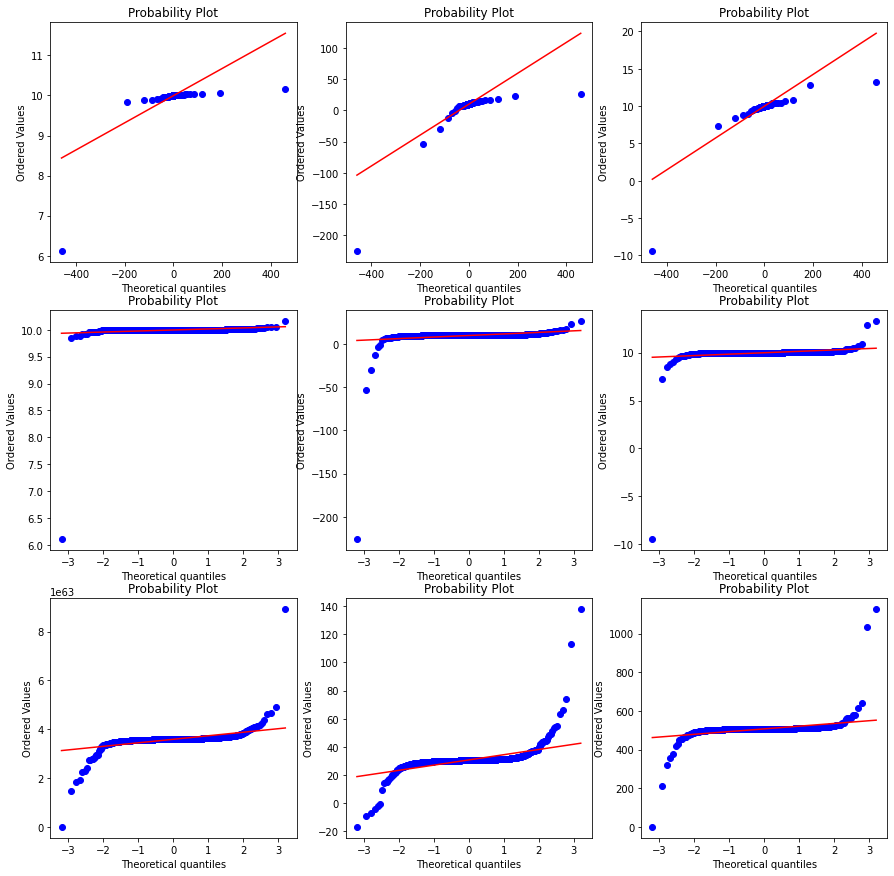

In [7]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
for index, rv in enumerate([rv_half, rv_1, rv_2]):
    x = rv.rvs(1000)

    prob = stats.probplot(x, dist=stats.cauchy, plot=ax[0][index])
    prob = stats.probplot(x, dist=stats.norm, plot=ax[1][index])
    xt, lmax_mle = stats.yeojohnson(x)
    print ("Max likelihod yeojohnson loc {} scale {} transformed loc {}".format(loc, (index+1)/2, lmax_mle))

    lmax_pearsonr = stats.yeojohnson_normmax(x)
    print ("Max likelihod yeojohnson pearsonrloc {} scale {} transformed loc {}".format(loc, (index+1)/2, lmax_pearsonr))

    prob = stats.probplot(xt, dist=stats.norm, plot=ax[2][index])

### Transforming with yeojohnson and plotting the histogram

Max likelihod yeojohnson loc 10 scale 0.5 transformed loc -10.978024153104741
Max likelihod yeojohnson loc 10 scale 1.0 transformed loc 0.75743891613401
Max likelihod yeojohnson loc 10 scale 1.5 transformed loc 4.505696516705801


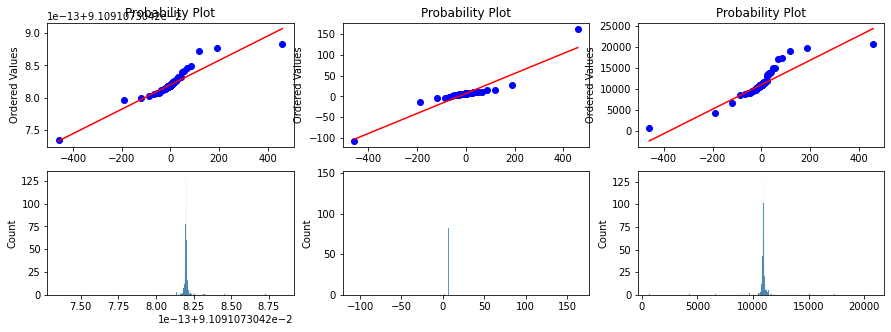

In [8]:
fig, ax = plt.subplots(2,3, figsize=(15,5))
#Plot 1 = Histogram
#g1 = sns.histplot(data=df, x='Price_in_thousands', ax=g[0]);

for index, rv in enumerate([rv_half, rv_1, rv_2]):
    x = rv.rvs(1000)
    xt, lmax_mle = stats.yeojohnson(x)
    print ("Max likelihod yeojohnson loc {} scale {} transformed loc {}".format(loc, (index+1)/2, lmax_mle))
    prob = stats.probplot(xt, dist=stats.cauchy, plot=ax[0][index])
    ax[0][index].set_xlabel('')
    g1 = sns.histplot(data=xt, ax=ax[1][index]);

## Confidence Interval

From a normal distribution, it becomes easier to calculate confidence intervals. If we know that 95% of our data will be within 2 standard deviations, then we can just consider what’s within those limits.

####  Confidence Interval 95%

For the last estimated likelihood 

In [10]:
upper = lmax_mle + 0.2
lower = lmax_mle - 0.2
print(f'The confidence interval for 95% level is between {round(lower,2)} and {upper}.')

The confidence interval for 95% level is between -13.33 and -12.92936976907712.


However, we must not forget that the values are transformed. So, what now?

There’s another good tool from scipy that is the inverse Box-Cox operation. In order to use that, you must import from scipy.special import inv_boxcox . Then, notice that when we transformed the data, we found the optimal lambda. Now it is time to use it for the inverse operation.


In [11]:

# Import the inverse Box-Cox
from scipy.special import inv_boxcox
# Apply the inversion using the lambda value found on the prior transformation
upper_invert = inv_boxcox(upper, lmax_mle)
lower_invert = inv_boxcox(lower, lmax_mle)
# Print the result
print(f'The confidence interval for 95% level is between {round(lower_invert,2)} and { round(upper_invert,2) }.')

The confidence interval for 95% level is between 0.67 and 0.68.


In [12]:
for index, rv in enumerate([rv_half, rv_1, rv_2]):
    x = rv.rvs(1000)
    xt, lmax_mle = stats.yeojohnson(x)
    upper = lmax_mle + 0.2
    lower = lmax_mle - 0.2
    # Apply the inversion using the lambda value found on the prior transformation
    upper_invert = inv_boxcox(upper, lmax_mle)
    lower_invert = inv_boxcox(lower, lmax_mle)
    print(f'The confidence interval for 95% level is between {round(lower_invert,2)} and { round(upper_invert,2) }.')

The confidence interval for 95% level is between 0.62 and 0.62.
The confidence interval for 95% level is between 2.09 and 2.33.
The confidence interval for 95% level is between 0.64 and 0.92.


## Comparing interval

In [ ]:
rv_1.interval(alpha=0.9)

(3.686248485324959, 16.31375151467504)

In [ ]:
rv_2.interval(alpha=0.9)

(-2.6275030293500823, 22.62750302935008)

In [ ]:
stats.norm(loc=10, scale=0.1).interval(alpha=0.95)

(9.804003601545995, 10.195996398454005)

In [ ]:
stats.cauchy(loc=10, scale=0.01).interval(alpha=0.95)

(9.872937952638253, 10.127062047361747)